    Beginning the Regression Preparation

In [1]:

import pandas as pd

Building a MultiVariate Regression Model taking in Drug Claim Counts

In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso, LassoCV
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
pd.set_option("display.max_columns", 150) #increase column options

In [3]:
ML_dataset = pd.read_csv("data\ML_dataset.csv")

In [4]:
ML_dataset.head()

,specialty_description,nppes_provider_city,total_claim_count,total_drug_cost,total_day_supply,total_30_day_fill_count,bene_count,brand_percent_spending
0,39,9174,1946,140189.01,58605,2054.8,276.0,0.756466
1,108,9331,90,7561.21,2681,110.0,11.0,0.869739
2,32,8930,200,14549.85,7587,307.2,65.0,0.535970
3,70,3003,4981,258258.70,337309,11494.1,459.0,0.567573
4,88,7343,7165,379661.02,333309,11406.5,461.0,0.724479




Begin Model Building and Fitting

Input and Output

In [5]:
Labels = ML_dataset.drop("brand_percent_spending", axis=1).columns.tolist() #columns of drugs
print(Labels)

['specialty_description', 'nppes_provider_city', 'total_claim_count', 'total_drug_cost', 'total_day_supply', 'total_30_day_fill_count', 'bene_count']


In [6]:
X = ML_dataset[Labels]
y = ML_dataset["brand_percent_spending"]


PCA Feature Selection with Scaling

In [7]:
#X = StandardScaler().fit_transform(X)

C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
PCA = PCA(n_components = 'mle')
X = PCA.fit_transform(X)

In [9]:
print(PCA.explained_variance_ratio_)  

[3.98344151 1.11966348 0.95046821 0.5165188  0.35340836 0.07321407]


In [13]:
most_important = [np.abs(PCA.components_[i]).argmax() for i in range(len(PCA.components_))]
most_important_names = [Labels[most_important[i]] for i in range(len(PCA.components_))]
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(len(PCA.components_))}
newLabels = list(dic.values())
newLabels

['total_30_day_fill_count',
 'specialty_description',
 'nppes_provider_city',
 'total_drug_cost',
 'bene_count',
 'total_claim_count']

Splitting Data into Test and Train

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#Split into Test and Train


Fit data into Lasso/L1 Model

In [15]:

regressor = LassoCV(alphas=[1,.5,.1,0], precompute = 'auto', positive= True,tol = 1e-4)
regressor.fit(X_train, y_train)

C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:474: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\John Lee\Anaconda3\lib\site-packages\sklearn\linear

LassoCV(alphas=[1, 0.5, 0.1, 0], copy_X=True, cv='warn', eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
    normalize=False, positive=True, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

Coefficients of Model

In [16]:
regressor.alpha_

0.0

In [17]:
print(len(regressor.coef_))

6


In [18]:
coeff_df = pd.DataFrame( regressor.coef_ , newLabels, columns=['Coefficient'])  
#coeff_df = coeff_df[coeff_df["Coefficient"] != 0]
coeff_df.sort_values("Coefficient" ,ascending = False) #Coefficients for each feature used

,Coefficient
specialty_description,0.087766
total_drug_cost,0.018874
total_30_day_fill_count,0.009951
nppes_provider_city,0.000000
bene_count,0.000000
total_claim_count,0.000000


Predictions

In [19]:
y_pred = regressor.predict(X_test)

In [32]:
len(y_pred)

137361

In [33]:
len(y_test)

137361

In [20]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head(25) #Actual Vs Predicted Dataframe

,Actual,Predicted
308724,0.624626,0.678265
511010,0.877905,0.553508
415212,0.511209,0.623119
21567,0.894008,0.713779
17190,0.754700,0.678799
181166,0.976848,0.813991
281422,0.764431,0.795377
279589,0.805266,0.524964
344681,0.835780,0.696111
447188,0.576460,0.502204


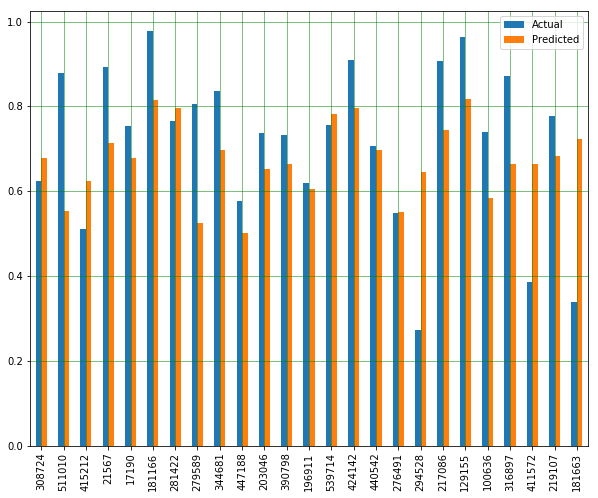

In [21]:
comparison_df.iloc[0:25].plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Text(0, 0.5, 'Predicted')

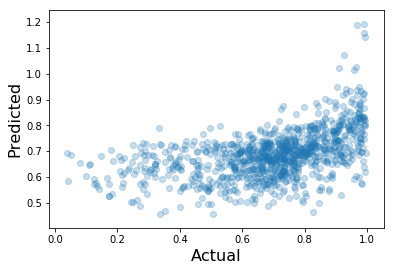

In [22]:
plt.scatter(comparison_df.iloc[0:1000]["Actual"], comparison_df.iloc[0:1000]["Predicted"], alpha = .25)
plt.xlabel("Actual", fontsize = 16) #scatter plot of specialty combined data
plt.ylabel("Predicted",  fontsize = 16)

Statistics

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
mse = metrics.mean_squared_error(y_test, y_pred)

Mean Absolute Error: 0.13690676033320376
Mean Squared Error: 0.031615464456709964


In [24]:
print("r Squared:", metrics.r2_score(y_test, y_pred))
rsq = metrics.r2_score(y_test, y_pred)

r Squared: 0.2251647629710185


In [25]:
metrics_df = pd.read_csv("data\metrics_df.csv")

In [26]:
metrics_df = metrics_df.append({"Input": Labels, "R Squared": rsq, "Mean Absolute Error": mae, "Mean Squared Error": mse, "Model": "Lasso Linear"}, ignore_index=True)

In [27]:
metrics_df.tail()

,Input,R Squared,Mean Absolute Error,Mean Squared Error,Model
30,"['specialty_description', 'nppes_provider_city...",0.492590,0.107130,0.020644,Neural Network
31,"['specialty_description', 'nppes_provider_city...",0.679706,0.079021,0.013095,Random Forest
32,"['specialty_description', 'nppes_provider_city...",0.259210,0.132228,0.030270,Lasso Linear
33,"['specialty_description', 'nppes_provider_city...",0.256006,0.132379,0.030284,Lasso Linear
34,"[specialty_description, nppes_provider_city, t...",0.225165,0.136907,0.031615,Lasso Linear


In [28]:
metrics_df.to_csv("data\metrics_df.csv", index = False)

Save Weights

In [29]:
from sklearn.externals.joblib import dump,load

In [30]:
dump(regressor, "Model_Weights\L1\Lasso_trainedModel") 

['Model_Weights\\L1\\Lasso_trainedModel']